In [5]:
#Part 1 Start

#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#import csv
df = pd.read_csv('job.csv')

In [6]:
#Use the head() function to inspect the first few rows.
df.head()

,job_id,company_id,title,description,max_salary,med_salary,min_salary,pay_period,formatted_work_type,location,...,expiry,closed_time,formatted_experience_level,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type
0,85008768,NaN,Licensed Insurance Agent,While many industries were hurt by the last fe...,52000.0,NaN,45760.0,YEARLY,Full-time,"Chico, CA",...,1.710000e+12,NaN,NaN,NaN,1.690000e+12,NaN,1,FULL_TIME,USD,BASE_SALARY
1,133114754,77766802.0,Sales Manager,Are you a dynamic and creative marketing profe...,NaN,NaN,NaN,NaN,Full-time,"Santa Clarita, CA",...,1.700000e+12,NaN,NaN,NaN,1.690000e+12,NaN,0,FULL_TIME,NaN,NaN
2,133196985,1089558.0,Model Risk Auditor,Join Us as a Model Risk Auditor – Showcase You...,NaN,NaN,NaN,NaN,Contract,"New York, NY",...,1.700000e+12,NaN,NaN,NaN,1.690000e+12,NaN,0,CONTRACT,NaN,NaN
3,381055942,96654609.0,Business Manager,Business ManagerFirst Baptist Church ForneyFor...,NaN,NaN,NaN,NaN,Full-time,"Forney, TX",...,1.700000e+12,NaN,NaN,NaN,1.690000e+12,NaN,0,FULL_TIME,NaN,NaN
4,529257371,1244539.0,NY Studio Assistant,YOU COULD BE ONE OF THE MAGIC MAKERS\nKen Fulk...,NaN,NaN,NaN,NaN,Full-time,"New York, NY",...,1.710000e+12,NaN,NaN,NaN,1.690000e+12,NaN,1,FULL_TIME,NaN,NaN


In [7]:
#Check for missing data and data types. Apply basic data cleaning like filling in or dropping missing values

# Checking for missing data
print("Missing Data:\n", df.isnull().sum())

Missing Data:
 job_id                            0
company_id                      366
title                             0
description                       1
max_salary                    10365
med_salary                    14905
min_salary                    10365
pay_period                     9384
formatted_work_type               0
location                          0
applies                        7186
original_listed_time              0
remote_allowed                13546
views                          2763
job_posting_url                   0
application_url                6091
application_type                  0
expiry                            0
closed_time                   14958
formatted_experience_level     4902
skills_desc                   15742
listed_time                       0
posting_domain                 6842
sponsored                         0
work_type                         0
currency                       9384
compensation_type              9384
dtype: int64


In [8]:
#Check for data types
print("\nData Types:\n", df.dtypes)


Data Types:
 job_id                          int64
company_id                    float64
title                          object
description                    object
max_salary                    float64
med_salary                    float64
min_salary                    float64
pay_period                     object
formatted_work_type            object
location                       object
applies                       float64
original_listed_time          float64
remote_allowed                float64
views                         float64
job_posting_url                object
application_url                object
application_type               object
expiry                        float64
closed_time                   float64
formatted_experience_level     object
skills_desc                    object
listed_time                   float64
posting_domain                 object
sponsored                       int64
work_type                      object
currency                       objec

In [9]:
#Data Cleaning: Check for missing data and data types. 
#Apply basic data cleaning like filling in or dropping missing values..
#Filling missing med_salary values with the mean
df['med_salary'].fillna(df['med_salary'].mean())

0        41167.664404
1        41167.664404
2        41167.664404
3        41167.664404
4        41167.664404
             ...     
15881    41167.664404
15882    41167.664404
15883    41167.664404
15884    41167.664404
15885    41167.664404
Name: med_salary, Length: 15886, dtype: float64

In [10]:
df['min_salary'].fillna(df['min_salary'].mean())

0         45760.000000
1         62352.218073
2         62352.218073
3         62352.218073
4         62352.218073
             ...      
15881     62352.218073
15882     62352.218073
15883     62352.218073
15884    110000.000000
15885     62352.218073
Name: min_salary, Length: 15886, dtype: float64

In [11]:
df['max_salary'].fillna(df['max_salary'].mean())

0         52000.000000
1         88336.222112
2         88336.222112
3         88336.222112
4         88336.222112
             ...      
15881     88336.222112
15882     88336.222112
15883     88336.222112
15884    135000.000000
15885     88336.222112
Name: max_salary, Length: 15886, dtype: float64

In [13]:
# Data Cleaning
# Filling missing med_salary values with the mean
df['remote_allowed'].fillna('Dont care')

0        Dont care
1        Dont care
2        Dont care
3        Dont care
4        Dont care
           ...    
15881    Dont care
15882    Dont care
15883    Dont care
15884    Dont care
15885    Dont care
Name: remote_allowed, Length: 15886, dtype: object

In [ ]:
# Dropping rows where field is missing
df.dropna(subset=['application_url', 'posting_domain'], inplace=True)

#To remove entire column
#df.drop(['remote_allowed'], axis=1)

#axis row is 0, column is 1

In [ ]:
# Display the cleaned DataFrame
print("\nCleaned DataFrame:\n", df)

In [ ]:
#Part 2: Exploratory Data Analysis

In [14]:
# Calculate descriptive statistics for the specified columns
df[['max_salary', 'min_salary', 'med_salary']].describe()

,max_salary,min_salary,med_salary
count,5.521000e+03,5521.000000,981.000000
mean,8.833622e+04,62352.218073,41167.664404
std,9.068282e+04,59487.692283,93682.094905
min,1.000000e+01,10.000000,10.000000
25%,4.800000e+01,38.000000,18.000000
50%,8.200000e+04,60000.000000,26.000000
75%,1.400000e+05,99000.000000,52000.000000
max,1.300000e+06,800000.000000,998426.000000


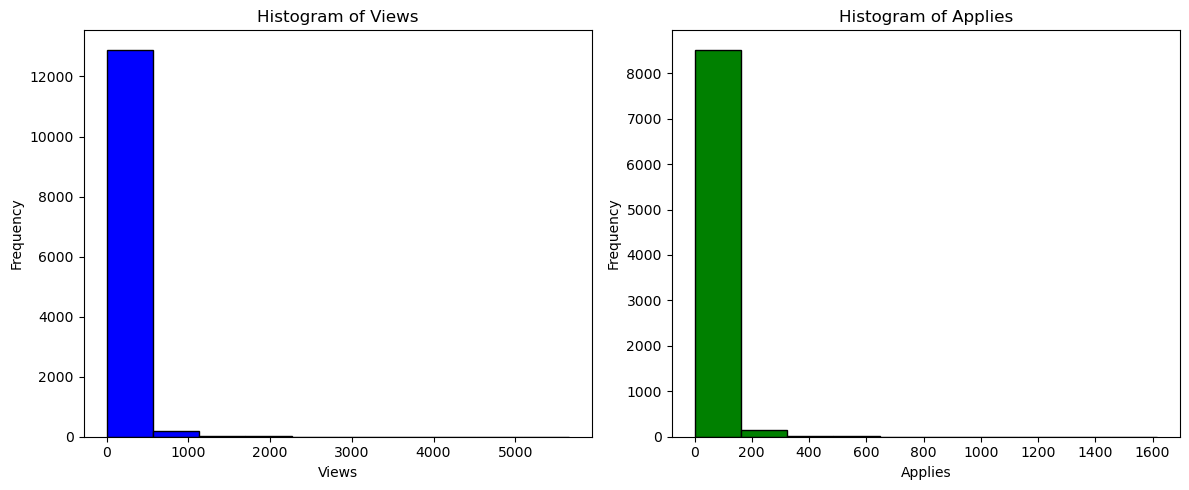

In [15]:
# Creating histograms for views and applies
plt.figure(figsize=(12, 5))

# Histogram for the 'views' column
plt.subplot(1, 2, 1) # 1 row, 2 columns, first plot
#plt.xlim(0, 2000)  # Set limits
#plt.xticks([0, 250, 500, 750, 1000,1250,1500,1750,2000], rotation=45)  # Customize ticks and rotate labels
plt.hist(df['views'], bins=10, color='blue', edgecolor='black')
plt.title('Histogram of Views')
plt.xlabel('Views')
plt.ylabel('Frequency')

# Histogram for the 'applies' column
plt.subplot(1, 2, 2) # 1 row, 2 columns, second plot
plt.hist(df['applies'], bins=10, color='green', edgecolor='black')
plt.title('Histogram of Applies')
plt.xlabel('Applies')
plt.ylabel('Frequency')

# Display the histograms
plt.tight_layout()
plt.show()

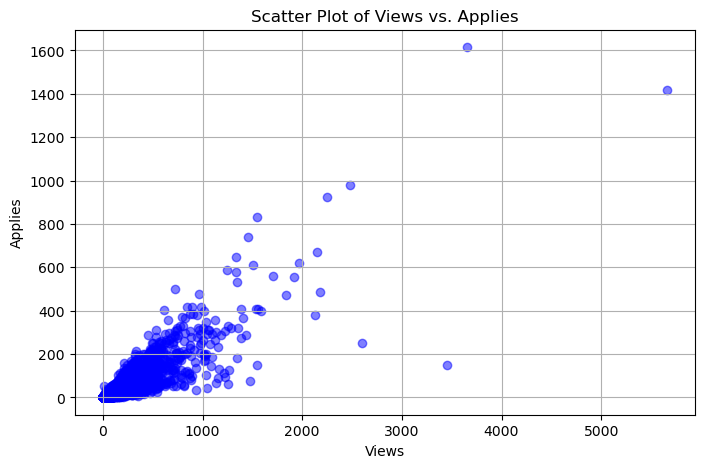

In [16]:
# Creating the scatter plot for views and applies
plt.figure(figsize=(8, 5))  # Set the figure size
plt.scatter(df['views'], df['applies'], color='blue', alpha=0.5)  # Plot data points

# Adding title and labels
plt.title('Scatter Plot of Views vs. Applies')
plt.xlabel('Views')
plt.ylabel('Applies')

# Show the plot
plt.grid(True)  # Add grid for better readability
plt.show()

In [ ]:
#Part 3 Data Visualization and Matplotlib

In [ ]:
#Create a bar plot showing the number of jobs by work_type.
#Customize your plots by adding labels, titles, and legends.
# Counting the number of jobs by work_type
job_counts = df['work_type'].value_counts()

# Creating the bar plot
job_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Adding title and labels
plt.title('Number of Jobs by Work Type')
plt.xlabel('Work Type')
plt.ylabel('Number of Jobs')

# Show the plot
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.show()

In [ ]:
# Calculating max salary by work_type
max_salary = df.groupby('work_type')['max_salary'].max().reset_index()

# Sorting the DataFrame by work_type for a more logical order in the plot
max_salary.sort_values('work_type', inplace=True)

# Plotting the line graph
plt.figure(figsize=(8, 5))
plt.plot(max_salary['work_type'], max_salary['max_salary'], marker='o', linestyle='-', color='green')

# Adding title and labels
plt.title('Max Salary by Work Type')
plt.xlabel('Work Type')
plt.ylabel('Max Salary ($)')

# Show the plot
plt.grid(True)
plt.show()

In [ ]:
# Calculating min salary by work_type
min_salary = df.groupby('work_type')['min_salary'].min().reset_index()

# Sorting the DataFrame by work_type for a more logical order in the plot
min_salary.sort_values('work_type', inplace=True)

# Plotting the line graph
plt.figure(figsize=(8, 5))
plt.plot(min_salary['work_type'], min_salary['min_salary'], marker='o', linestyle='-', color='green')

# Adding title and labels
plt.title('Min Salary by Work Type')
plt.xlabel('Work Type')
plt.ylabel('Min Salary ($)')

# Show the plot
plt.grid(True)
plt.show()

In [ ]:
#Part 4 Data Visualization with Seaborn

In [ ]:
#Use Seaborn to create a pair plot of numerical variables like salaries and views.
# Creating a pair plot
sns.pairplot(df[['max_salary', 'views']])
plt.show()

In [ ]:
#Create a heatmap of correlations between numerical variables.
# Calculating the correlation matrix
corr = df[['max_salary', 'views']].corr()

# Creating a heatmap for the correlation matrix
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.show()